In [5]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

In [173]:
def func_logis(col_list,percentage,year,normarize):
    col_list = col_list
    percentage = percentage
    normarize = normarize

    # col_list = ['停止・低下ユニット数合計','spot_volume(kWh)']
    # percentage = 50

    files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
    version = len(files)-1
    df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})
    df_king = df_king[df_king['DateTime'].dt.year>=year]
    # 時間の情報を追加
    hours =df_king['DateTime'].dt.hour.values
    df_king['hours'] = hours
    sin_hours = np.sin(np.pi*hours/24)
    df_king['sin_hours'] = sin_hours




    # 価格差をあるなしに変換
    df_king['絶対値gap_price[intra-spot](円/kWh)'] = np.abs(df_king['gap_price[intra-spot](円/kWh)'])
    # df_king['gap_judge'] ='ない'
    # df_king.loc[df_king['絶対値gap_price[intra-spot](円/kWh)']>=0.83,['gap_judge']] ='ある'
    col_add_judge = col_list.copy()
    col_add_judge.append('絶対値gap_price[intra-spot](円/kWh)')
    df_add_judge = df_king[col_add_judge].dropna()
    df_add_judge['gap_judge'] = 'ない'
    gap_array  = df_add_judge['絶対値gap_price[intra-spot](円/kWh)'].values

    judge_price =np.percentile(gap_array,percentage)
    df_add_judge.loc[df_add_judge['絶対値gap_price[intra-spot](円/kWh)']>= judge_price,['gap_judge']] ='ある'

    df_select = df_add_judge.drop(columns='絶対値gap_price[intra-spot](円/kWh)')

    # df_select['gap_judge'] = 'ない'
    df_X= df_select[col_list]
    df_Y=pd.DataFrame()
    df_Y['gap_judge'] = df_select['gap_judge'].map({'ない': 0, 'ある': 1})

    # 標準化
    if normarize == 'する':

        scaler = StandardScaler()
        scaler.fit(np.array(df_X))
        df_std = scaler.transform(np.array(df_X))
        df_std = pd.DataFrame(df_std,columns=df_X.columns)
    else:
        df_std =df_X
    # 目的変数(Y)
    # Y = np.array(df['gap_judge'])

    # 説明変数(X)
    # col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
    X = np.array(df_std)
    Y = np.array(df_Y['gap_judge'])
    # データの分割(訓練データとテストデータ)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




    lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
    lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

    print("coefficient = ", lr.coef_)
    print("intercept = ", lr.intercept_)


    Y_pred = lr.predict(X_test)



    print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
    print('新陰性','偽陽性','偽陰性','新陽性')

    print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
    print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
    print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
    print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))



    # sns.pairplot(df_select, hue='gap_judge',markers=['+','x'],palette='Greys',plot_kws={"s":1, "alpha":0.8, "linewidth":0.2})
    sns.pairplot(df_select, hue='gap_judge',markers='.',
    palette='Greys',
    plot_kws={"s":3, "alpha":0.8, "linewidth":0.2})

    plt.show()
    print('判別価格',judge_price)
    return(df_king)

coefficient =  [[-0.22080833  0.24395225]]
intercept =  [-0.87458125]
confusion matrix = 
 [[17741     6]
 [ 7561     4]]
新陰性 偽陽性 偽陰性 新陽性
accuracy =  0.7010508849557522
precision =  0.4
recall =  0.0005287508261731659
f1 score =  0.0010561056105610562


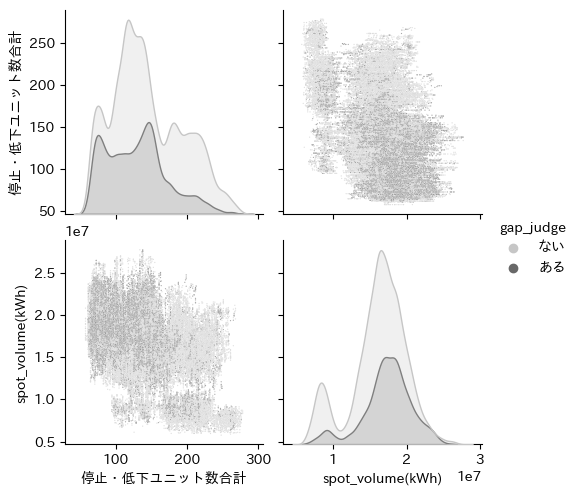

判別価格 1.5300000000000011


In [174]:
col_names = [
        # '低下量合計',
        '停止・低下ユニット数合計', 
        # '北電太陽光error(実績-想定)(kWh)',
    #    '北電風力error(実績-想定)(kWh)', 
    #    '九電太陽光error(実績-想定)(kWh)',
    #    '九電風力error(実績-想定)(kWh)', 
    #    '東電太陽光error(実績-想定)(kWh)',
    #    '東電風力error(実績-想定)(kWh)', 
    #    '関電太陽光error(実績-想定)(kWh)',
    #    '関電風力error(実績-想定)(kWh)', 
    #    '中国太陽光error(実績-想定)(kWh)',
    #    '中国風力error(実績-想定)(kWh)', 
    #    '絶対値北電太陽光error(実績-想定)(kWh)',
    #    '絶対値北電風力error(実績-想定)(kWh)', 
    #    '絶対値九電太陽光error(実績-想定)(kWh)',
    #    '絶対値九電風力error(実績-想定)(kWh)', 
    #    '絶対値東電太陽光error(実績-想定)(kWh)',
    #    '絶対値東電風力error(実績-想定)(kWh)', 
    #    '絶対値関電太陽光error(実績-想定)(kWh)',
    #    '絶対値関電風力error(実績-想定)(kWh)', 
    #    '絶対値中国太陽光error(実績-想定)(kWh)',
    #    '絶対値中国風力error(実績-想定)(kWh)', 
    #    '太陽光誤差合算(実績-想定)(kWh)(ならし)',
    #    '風力誤差合算(実績-想定)(kWh)(ならし)', 
    #    '太陽光絶対値誤差合算(実績-想定)(kWh)',
    #    '風力絶対値誤差合算(実績-想定)(kWh)', 
    #    '広域予備率平均値(%)',
    # '東京予備率(%)',
    'spot_volume(kWh)',
    # 'sin_hours',
]
year = 2018
df = func_logis(col_names ,70,year,'する')

In [171]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [167]:
df

,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh),intra_volume（MWh/h）,spot_volume(kWh),北電太陽光想定(kWh),北電風力想定(kWh),北電太陽光実績(kWh),北電風力実績(kWh),...,絶対値中国太陽光error(実績-想定)(kWh),絶対値中国風力error(実績-想定)(kWh),太陽光誤差合算(実績-想定)(kWh)(ならし),風力誤差合算(実績-想定)(kWh)(ならし),太陽光絶対値誤差合算(実績-想定)(kWh),風力絶対値誤差合算(実績-想定)(kWh),広域予備率平均値(%),hours,sin_hours,絶対値gap_price[intra-spot](円/kWh)
66655,2022-01-01 00:00:00,20.57,15.46,5.11,349.4,16671250,0.0,85100.0,0.0,71100.0,...,0.0,15113.0,0.0,5242.156514,0.0,24983.843486,NaN,0,0.000000,5.11
66656,2022-01-01 00:30:00,21.39,15.46,5.93,290.5,17250450,0.0,85200.0,0.0,68400.0,...,0.0,13892.0,0.0,582.446547,0.0,27201.553453,NaN,0,0.000000,5.93
66657,2022-01-01 01:00:00,21.17,15.46,5.71,266.0,17568350,0.0,85100.0,0.0,70600.0,...,0.0,14035.0,0.0,-2708.299503,0.0,30913.700497,NaN,1,0.130526,5.71
66658,2022-01-01 01:30:00,18.73,15.46,3.27,416.4,17867750,0.0,85450.0,0.0,71250.0,...,0.0,11979.0,0.0,-2002.255291,0.0,27555.744709,NaN,1,0.130526,3.27
66659,2022-01-01 02:00:00,19.00,15.46,3.54,363.4,17997900,0.0,86250.0,0.0,69050.0,...,0.0,9156.0,0.0,8838.421317,0.0,24570.421317,NaN,2,0.258819,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84410,2023-01-05 21:30:00,NaN,21.29,NaN,NaN,22544600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,0.382683,NaN
84411,2023-01-05 22:00:00,NaN,21.86,NaN,NaN,22180900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0.258819,NaN
84412,2023-01-05 22:30:00,NaN,21.86,NaN,NaN,22143700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,0.258819,NaN
84413,2023-01-05 23:00:00,NaN,21.74,NaN,NaN,22054200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,0.130526,NaN


In [138]:
hours =df_king['DateTime'].dt.hour.values
sin_hours = np.sin(np.pi*hours/24)
df_king['hours'] = sin_hours

In [121]:
np.sin(hours/24).max()

0.8182345643342713

In [135]:
np.sin(np.pi*hours/24)

array([0.        , 0.        , 0.13052619, ..., 0.25881905, 0.13052619,
       0.13052619])

In [87]:
df_king[df_king['DateTime'].dt.year>=2021]

,DateTime,intra_price(円/kWh),spot_price(円/kWh),gap_price[intra-spot](円/kWh),intra_volume（MWh/h）,spot_volume(kWh),北電太陽光想定(kWh),北電風力想定(kWh),北電太陽光実績(kWh),北電風力実績(kWh),...,絶対値関電太陽光error(実績-想定)(kWh),絶対値関電風力error(実績-想定)(kWh),絶対値中国太陽光error(実績-想定)(kWh),絶対値中国風力error(実績-想定)(kWh),太陽光誤差合算(実績-想定)(kWh)(ならし),風力誤差合算(実績-想定)(kWh)(ならし),太陽光絶対値誤差合算(実績-想定)(kWh),風力絶対値誤差合算(実績-想定)(kWh),広域予備率平均値(%),絶対値gap_price[intra-spot](円/kWh)
49128,2021-01-01 00:00:00,48.49,40.00,8.49,400.4,16001950,NaN,NaN,NaN,NaN,...,0.0,17267.0,0.0,20846.0,0.0,69059.690929,0.0,69059.690929,NaN,8.49
49129,2021-01-01 00:30:00,27.76,35.00,-7.24,352.8,15988000,NaN,NaN,NaN,NaN,...,0.0,18763.0,0.0,21987.0,0.0,69423.024637,0.0,71459.024637,NaN,7.24
49130,2021-01-01 01:00:00,27.52,35.00,-7.48,471.6,15798500,NaN,NaN,NaN,NaN,...,0.0,17482.0,0.0,22086.0,0.0,69418.113765,0.0,72762.113765,NaN,7.48
49131,2021-01-01 01:30:00,25.91,30.00,-4.09,304.3,15828200,NaN,NaN,NaN,NaN,...,0.0,16102.0,0.0,19503.0,0.0,58485.945423,0.0,64831.945423,NaN,4.09
49132,2021-01-01 02:00:00,27.93,25.02,2.91,391.1,15604350,NaN,NaN,NaN,NaN,...,0.0,15487.0,0.0,21866.0,0.0,55816.842351,0.0,76788.842351,NaN,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84410,2023-01-05 21:30:00,NaN,21.29,NaN,NaN,22544600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84411,2023-01-05 22:00:00,NaN,21.86,NaN,NaN,22180900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84412,2023-01-05 22:30:00,NaN,21.86,NaN,NaN,22143700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84413,2023-01-05 23:00:00,NaN,21.74,NaN,NaN,22054200,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


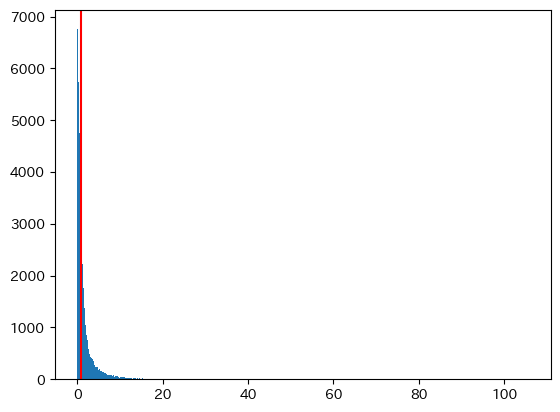

0.8300000000000001

In [14]:
# 差があるなしの基準値を求める。
gap_array =np.abs(df_king['gap_price[intra-spot](円/kWh)'].dropna().values)
plt.hist(gap_array,bins=1000)
plt.axvline(x=0.83,color = 'r')
plt.show()

np.percentile(gap_array,50)

# 4.2円/kWhとする


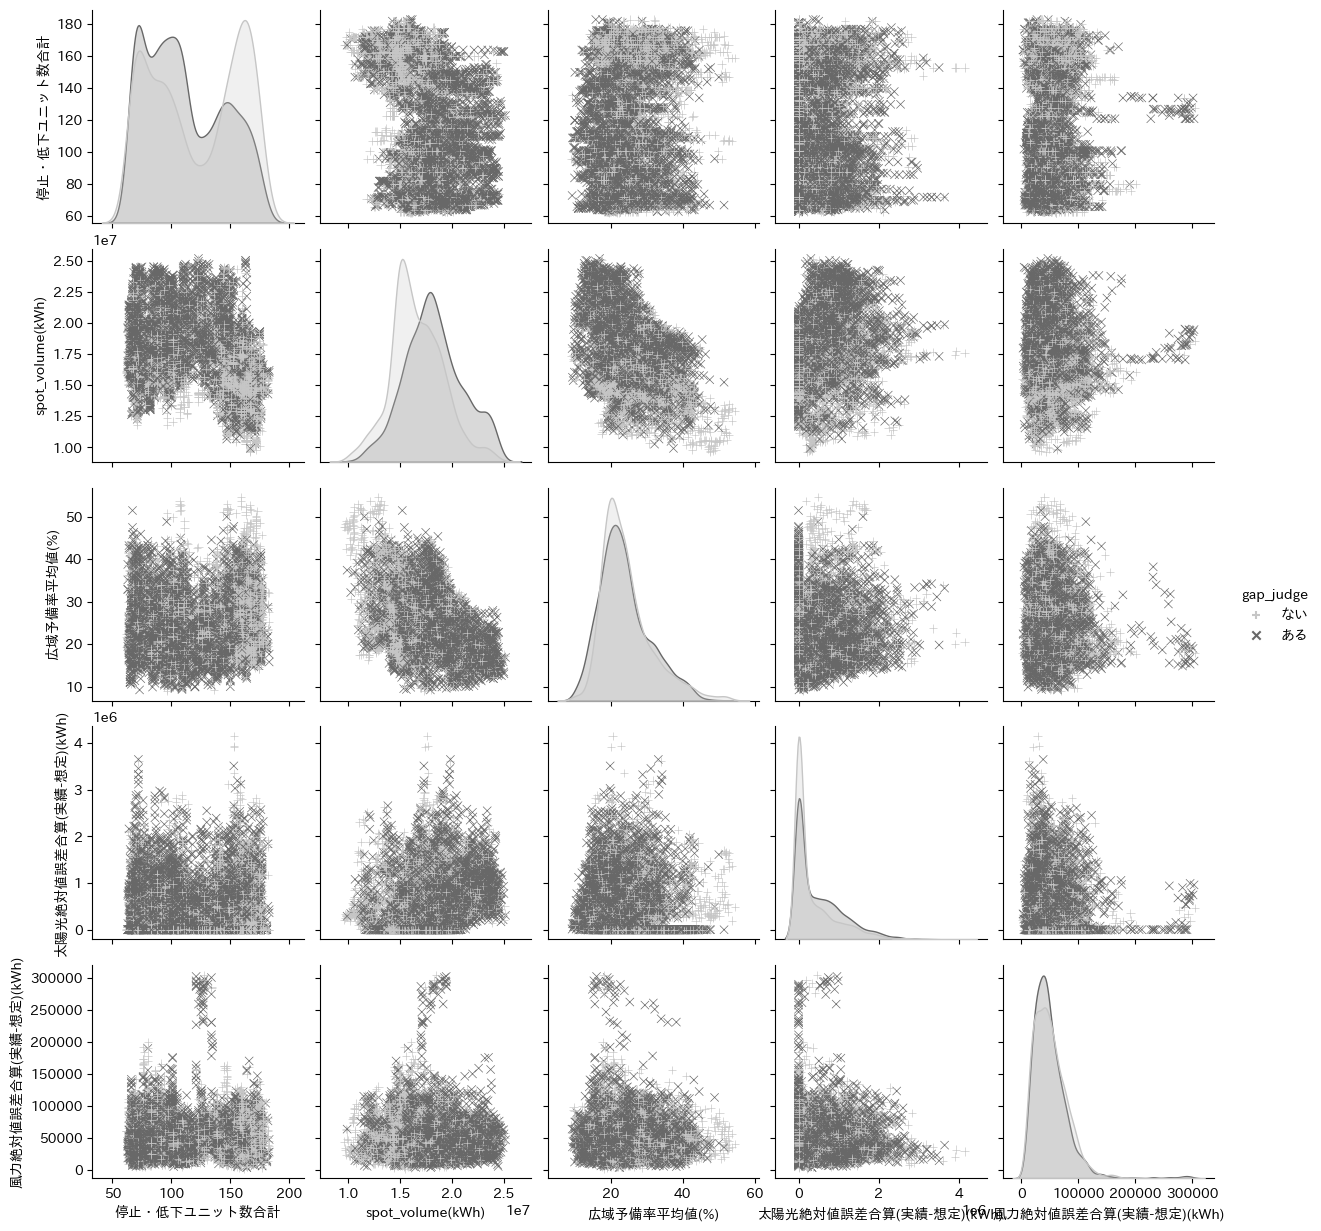

In [37]:
# 広域予備率あり
# df_select = df_[['gap_judge','広域予備率平均値(%)','太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']].dropna()
sns.pairplot(df_select, hue='gap_judge',markers=['+','x'],palette='Greys')
plt.show()

In [20]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})



# 価格差をあるなしに変換
df_king['絶対値gap_price[intra-spot](円/kWh)'] = np.abs(df_king['gap_price[intra-spot](円/kWh)'])
# df_king['gap_judge'] ='ない'
# df_king.loc[df_king['絶対値gap_price[intra-spot](円/kWh)']>=0.83,['gap_judge']] ='ある'

df_add_judge = df_king[['停止・低下ユニット数合計','spot_volume(kWh)','広域予備率平均値(%)','太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)','絶対値gap_price[intra-spot](円/kWh)']].dropna()
df_add_judge['gap_judge'] = 'ない'
gap_array  = df_add_judge['絶対値gap_price[intra-spot](円/kWh)'].values

judge_price =np.percentile(gap_array,50)
df_add_judge.loc[df_add_judge['絶対値gap_price[intra-spot](円/kWh)']>= judge_price,['gap_judge']] ='ある'

df_select = df_add_judge.drop(columns='絶対値gap_price[intra-spot](円/kWh)')

# df_select['gap_judge'] = 'ない'
df_X= df_select[['停止・低下ユニット数合計','spot_volume(kWh)']]
df_Y=pd.DataFrame()
df_Y['gap_judge'] = df_select['gap_judge'].map({'ない': 0, 'ある': 1})

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_Y['gap_judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))



sns.pairplot(df_select, hue='gap_judge',markers=['+','x'],palette='Greys')
plt.show()

coefficient =  [[-0.07209683  0.6195823 ]]
intercept =  [0.02804397]
confusion matrix = 
 [[864 569]
 [494 867]]
accuracy =  0.6195418754473873
precision =  0.6037604456824512
recall =  0.6370315944158707
f1 score =  0.6199499463711119


In [21]:
judge_price

2.6899999999999995

In [17]:
len(df_select[df_select.gap_judge =='ある'])

7425

In [18]:
len(df_select[df_select.gap_judge =='ない'])

1887

coefficient =  [[-0.12594882  0.12418247]]
intercept =  [0.01609882]
confusion matrix = 
 [[5468 7213]
 [4595 8036]]
accuracy =  0.5335018963337548
precision =  0.5269853760902354
recall =  0.6362124930725992
f1 score =  0.5764705882352942


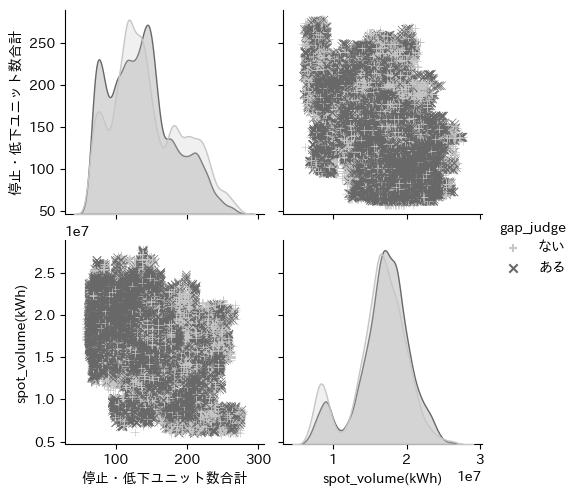

In [57]:
col_list = ['停止・低下ユニット数合計','spot_volume(kWh)']
percentage = 50

files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})




# 価格差をあるなしに変換
df_king['絶対値gap_price[intra-spot](円/kWh)'] = np.abs(df_king['gap_price[intra-spot](円/kWh)'])
# df_king['gap_judge'] ='ない'
# df_king.loc[df_king['絶対値gap_price[intra-spot](円/kWh)']>=0.83,['gap_judge']] ='ある'
col_add_judge = col_list.copy()
col_add_judge.append('絶対値gap_price[intra-spot](円/kWh)')
df_add_judge = df_king[col_add_judge].dropna()
df_add_judge['gap_judge'] = 'ない'
gap_array  = df_add_judge['絶対値gap_price[intra-spot](円/kWh)'].values

judge_price =np.percentile(gap_array,percentage)
df_add_judge.loc[df_add_judge['絶対値gap_price[intra-spot](円/kWh)']>= judge_price,['gap_judge']] ='ある'

df_select = df_add_judge.drop(columns='絶対値gap_price[intra-spot](円/kWh)')

# df_select['gap_judge'] = 'ない'
df_X= df_select[col_list]
df_Y=pd.DataFrame()
df_Y['gap_judge'] = df_select['gap_judge'].map({'ない': 0, 'ある': 1})

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_Y['gap_judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))



sns.pairplot(df_select, hue='gap_judge',markers=['+','x'],palette='Greys')
plt.show()

In [51]:
col_list = ['停止・低下ユニット数合計','spot_volume(kWh)']

In [67]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [53]:
col_list.append(0)

In [50]:
col_add_judge

In [55]:
col_list

['停止・低下ユニット数合計', 'spot_volume(kWh)', 0]